# VGG NET

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = "/content/drive/MyDrive/flowers"
IMG_SIZE = 180
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_data()

print(len(data))

100%|██████████| 984/984 [00:13<00:00, 71.45it/s] 

4323


In [ ]:
X = []
y = []

for features,label in tqdm(data):
    X.append(features)
    y.append(label)

100%|██████████| 4323/4323 [00:00<00:00, 1596405.72it/s]


In [ ]:
X = np.array(X)
X = X.  astype('float32') / 255
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 49)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',                          #Input
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))

model.add(MaxPooling2D(pool_size=(2,2)))                                                      #Pool1
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation ='relu'))


model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                        #Pool2
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                        #Pool3
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                         #Pool4
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(Flatten())                    #Flat Data
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                    

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,                                  # set input mean to 0 over the dataset
        samplewise_center=False,                                   # set each sample mean to 0
        featurewise_std_normalization=False,                       # divide inputs by std of the dataset
        samplewise_std_normalization=False,                        # divide each input by its std
        zca_whitening=False,               # apply ZCA whitening
        rotation_range=10,                 # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                  # Randomly zoom image
        width_shift_range=0.2,             # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,            # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,              # randomly flip images
        vertical_flip=False)               # randomly flip images
datagen.fit(x_train)

In [ ]:
history = model.fit(
    datagen.flow(x_train,y_train, batch_size=128),
    epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
21/21 [==============================] - 88s 3s/step - loss: 1.7262 - accuracy: 0.2422 - val_loss: 1.5994 - val_accuracy: 0.2387
Epoch 2/10
21/21 [==============================] - 34s 2s/step - loss: 1.6024 - accuracy: 0.2391 - val_loss: 1.6034 - val_accuracy: 0.2318
Epoch 3/10
21/21 [==============================] - 35s 2s/step - loss: 1.6050 - accuracy: 0.2360 - val_loss: 1.6008 - val_accuracy: 0.2387
Epoch 4/10
21/21 [==============================] - 34s 2s/step - loss: 1.6000 - accuracy: 0.2464 - val_loss: 1.6007 - val_accuracy: 0.2387
Epoch 5/10
21/21 [==============================] - 34s 2s/step - loss: 1.6019 - accuracy: 0.2352 - val_loss: 1.6005 - val_accuracy: 0.2387
Epoch 6/10
21/21 [==============================] - 34s 2s/step - loss: 1.6007 - accuracy: 0.2464 - val_loss: 1.6042 - val_accuracy: 0.2387
Epoch 7/10
21/21 [==============================] - 35s 2s/step - loss: 1.6024 - accuracy: 0.2464 - val_loss: 1.6029 - val_accuracy: 0.2387
Epoch 8/10
21/21 [==

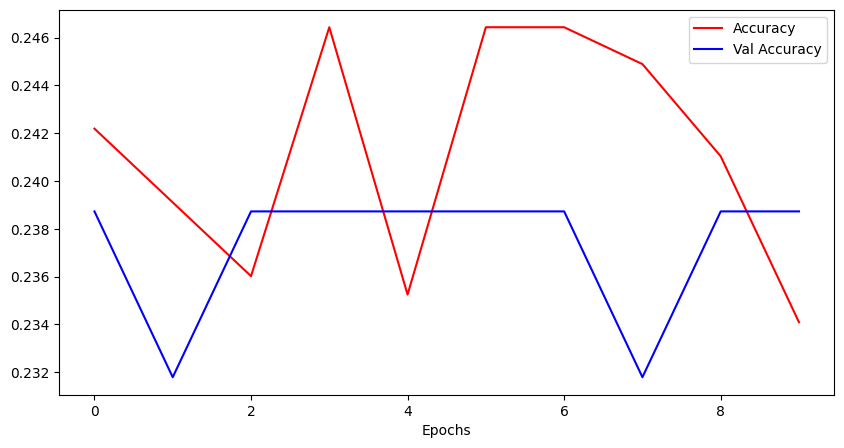

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Accuracy", color = "r")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

55/55 [==============================] - 5s 87ms/step - loss: 1.5992 - accuracy: 0.2387
1.5991665124893188 0.238728329539299


#**WITH SGD**

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',                          #Input
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))

model.add(MaxPooling2D(pool_size=(2,2)))                                                      #Pool1
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation ='relu'))


model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                        #Pool2
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                        #Pool3
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))                                         #Pool4
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'Same',activation ='relu'))

model.add(Flatten())                    #Flat Data
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,                                  # set input mean to 0 over the dataset
        samplewise_center=False,                                   # set each sample mean to 0
        featurewise_std_normalization=False,                       # divide inputs by std of the dataset
        samplewise_std_normalization=False,                        # divide each input by its std
        zca_whitening=False,               # apply ZCA whitening
        rotation_range=10,                 # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                  # Randomly zoom image
        width_shift_range=0.2,             # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,            # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,              # randomly flip images
        vertical_flip=False)               # randomly flip images
datagen.fit(x_train)

In [ ]:
history = model.fit(
    datagen.flow(x_train,y_train, batch_size=128),
    epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
21/21 [==============================] - 40s 2s/step - loss: 1.6093 - accuracy: 0.2352 - val_loss: 1.6091 - val_accuracy: 0.2387
Epoch 2/10
21/21 [==============================] - 42s 2s/step - loss: 1.6089 - accuracy: 0.2464 - val_loss: 1.6088 - val_accuracy: 0.2387
Epoch 3/10
21/21 [==============================] - 43s 2s/step - loss: 1.6086 - accuracy: 0.2464 - val_loss: 1.6085 - val_accuracy: 0.2387
Epoch 4/10
21/21 [==============================] - 37s 2s/step - loss: 1.6083 - accuracy: 0.2464 - val_loss: 1.6082 - val_accuracy: 0.2387
Epoch 5/10
21/21 [==============================] - 42s 2s/step - loss: 1.6080 - accuracy: 0.2464 - val_loss: 1.6079 - val_accuracy: 0.2387
Epoch 6/10
21/21 [==============================] - 42s 2s/step - loss: 1.6077 - accuracy: 0.2464 - val_loss: 1.6076 - val_accuracy: 0.2387
Epoch 7/10
21/21 [==============================] - 42s 2s/step - loss: 1.6074 - accuracy: 0.2464 - val_loss: 1.6074 - val_accuracy: 0.2387
Epoch 8/10
21/21 [==

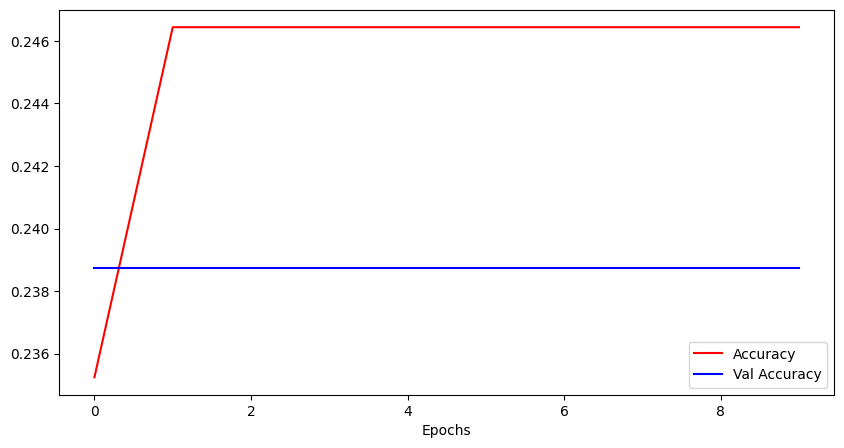

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Accuracy", color = "r")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()